## Housing price regression
Practice solving regression problems using the house price data set in Ames, Iowa, used in Week3.


By using 79 types of features (explanatory variables), you can set the problem of guessing the numerical value of housing prices. This kind of problem to guess continuous values is called a regression problem.

[!House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### List of methods used this time
We will use scikit-learn to train and estimate the following methods. We will not go into the details of each method at this stage. We will simply see that all of them can be easily used with the library, and that there are differences in the results of each method.

<li>Linear regression
<li>SVM
<li>Decision tree
<li>Random forest

There are some methods that can be used for both classification and regression problems, and others that cannot.

## Preparing the Data set
Download the dataset from Kaggle as in Week 3. We will use only train.csv.

[!Download dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

## Flow of regression problem
The flow of the regression problem is basically the same as that of the classification problem, so we will not explain it in detail as in Assignment 1.

## Preparation for practice
This dataset has 79 different features (objective variables), and as we saw in Week 3, it contains many different types of data. How to pre-process this is an important part of machine learning, but in this case, we will use only two explanatory variables (features), GrLivArea and YearBuilt, in order to prioritize the practice of learning and evaluation of regression problems.

In [2]:
import pandas as pd

## Problem 1: Feature selection for practice
After reading the dataset, extract the explanatory variables GrLivArea and YearBuilt, and the objective variable SalePrice, respectively.

In [3]:
data = pd.read_csv("train.csv")
data.loc[:,["GrLivArea","YearBuilt"]]
# data

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


In [4]:
data.loc[:,"SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## Problem 2: Estimation and evaluation by linear regression
Easily analyze and pre-process your data, then create and run a series of Linear regression training, estimation, evaluation, and visualization.

For regression problems, it is common to use Mean Squared Error (MSE) as an index value for evaluation.

Visualization can be done by the features on the horizontal axis and the estimated house price on the vertical axis.
Use scatter to create a graph that allows you to compare the actual data with the predicted results.

### Libs

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

### Train and Test sets split

In [6]:
my_X = data.loc[:,["GrLivArea","YearBuilt"]]
my_Y =data.loc[:,"SalePrice"]
X_train, X_test, y_train, y_test = train_test_split( np.array(my_X), np.array(my_Y), test_size=0.25, random_state=42)

### Learn

In [94]:
reg = LinearRegression().fit(X_train[:,0].reshape(-1, 1), y_train)

### Predict

In [96]:
y_predict = reg.predict(X_test[:,0].reshape(-1, 1))

### Evaluation 

In [97]:
mean_squared_error(y_test,y_predict)

3118447791.9869394

### Visualization

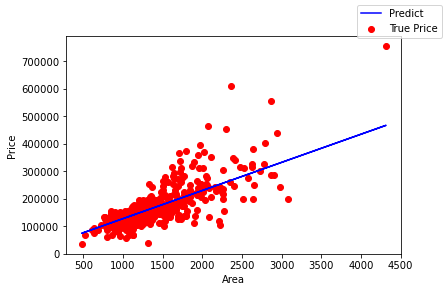

In [99]:
plt.scatter(X_test[:,0], y_test, c="Red",label="True Price")
plt.plot(X_test[:,0], y_predict, c="Blue",label="Predict")
# plt.plot
plt.xlabel("Area")
plt.ylabel("Price")
plt.figlegend()
plt.show()


## Problem 3: Comparison of methods
Learn, estimate, evaluate, and visualize all of the following methods. Then, summarize the index values ​​in one table. Take a brief look at the results using the table and the visualized diagram. Please state which method was good for which index value and what kind of figure it was.

<li> Linear regression
<li> SVM
<li> Decision tree
<li> Random forest </li>
    
The link to the official documentation is below. Originally, we will perform parameter tuning, but let's run with the default values first.

SVM, decision tree, and random forest are the same methods used in the classification problem, but there are separate libraries dedicated to each for the regression problem.

##  Using GrLivArea field

### Linear regression

MSE: 3118447791.9869394


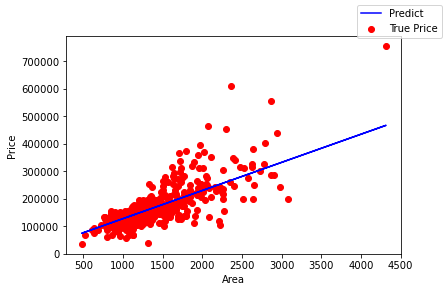

In [101]:
reg = LinearRegression().fit(X_train[:,0].reshape(-1, 1), y_train)
y_predict = reg.predict(X_test[:,0].reshape(-1, 1))
print("MSE:",mean_squared_error(y_test,y_predict))
ln1 = mean_squared_error(y_test,y_predict)
plt.scatter(X_test[:,0], y_test, c="Red",label="True Price")
plt.plot(X_test[:,0], y_predict, c="Blue",label="Predict")
plt.xlabel("Area")
plt.ylabel("Price")
plt.figlegend()
plt.show()

### SVM

In [62]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

MSE: 7171137498.473831


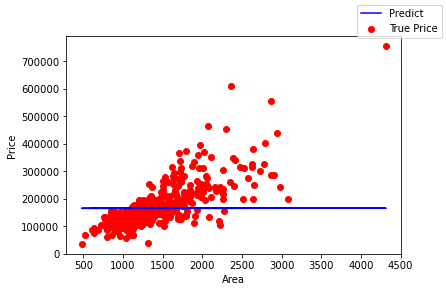

In [104]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train[:,0].reshape(-1, 1), y_train)
y_predict_svm = regr.predict(X_test[:,0].reshape(-1, 1))
print("MSE:",mean_squared_error(y_test,y_predict_svm))
svm1 = mean_squared_error(y_test,y_predict_svm)
plt.scatter(X_test[:,0], y_test, c="Red",label="True Price")
plt.plot(X_test[:,0], y_predict_svm, c="Blue",label="Predict")
plt.xlabel("Area")
plt.ylabel("Price")
plt.figlegend()
plt.show()

### Decision tree

In [71]:
from sklearn.tree import DecisionTreeRegressor

MSE: 4595868138.839861


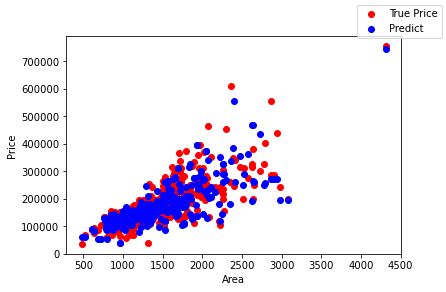

In [113]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train[:,0].reshape(-1, 1), y_train)
y_predict_dt = regressor.predict(X_test[:,0].reshape(-1, 1))
print("MSE:",mean_squared_error(y_test,y_predict_dt))
dt1 = mean_squared_error(y_test,y_predict_dt)
plt.scatter(X_test[:,0], y_test, c="Red",label="True Price")
plt.scatter(X_test[:,0], y_predict_dt, c="Blue",label="Predict")
plt.xlabel("Area")
plt.ylabel("Price")
plt.figlegend()
plt.show()

### Random forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

MSE: 3419859358.226372


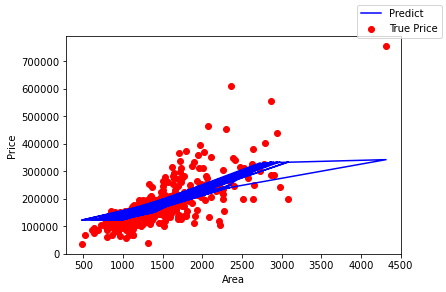

In [112]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train[:,0].reshape(-1, 1), y_train)
y_predict_rf = regr.predict(X_test[:,0].reshape(-1, 1))
print("MSE:",mean_squared_error(y_test,y_predict_rf))
rf1 = mean_squared_error(y_test,y_predict_rf)
plt.scatter(X_test[:,0], y_test, c="Red",label="True Price")
plt.scatter(X_test[:,0], y_predict_rf, c="Blue",label="Predict")
plt.xlabel("Area")
plt.ylabel("Price")
plt.figlegend()
plt.show()

## Using YearBuilt field

In [12]:
my_X = data.loc[:,["GrLivArea","YearBuilt"]]
my_Y =data.loc[:,"SalePrice"]
X_train, X_test, y_train, y_test = train_test_split( np.array(my_X), np.array(my_Y), test_size=0.25, random_state=42)

### Linear Regression

MSE: 5037617329.528072


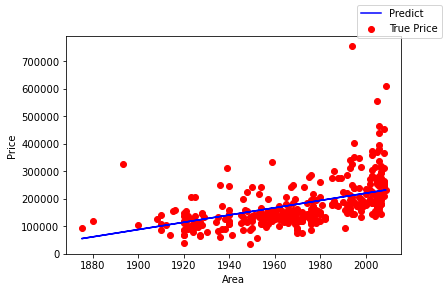

In [115]:
reg = LinearRegression().fit(X_train[:,1].reshape(-1, 1), y_train)
y_predict = reg.predict(X_test[:,1].reshape(-1, 1))
lr2 = mean_squared_error(y_test,y_predict)
print("MSE:",lr2)
plt.scatter(X_test[:,1], y_test, c="Red",label="True Price")
plt.plot(X_test[:,1], y_predict, c="Blue",label="Predict")
plt.xlabel("Area")
plt.ylabel("Price")
plt.figlegend()
plt.show()

### SVM

In [15]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

MSE: 7166030188.017618


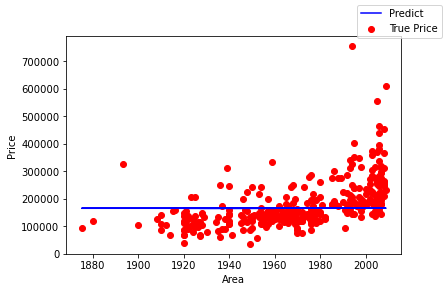

In [118]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train[:,1].reshape(-1, 1), y_train)
y_predict_svm = regr.predict(X_test[:,1].reshape(-1, 1))
print("MSE:",mean_squared_error(y_test,y_predict_svm))
svm2 = mean_squared_error(y_test,y_predict_svm)
plt.scatter(X_test[:,1], y_test, c="Red",label="True Price")
plt.plot(X_test[:,1], y_predict_svm, c="Blue",label="Predict")
plt.xlabel("Area")
plt.ylabel("Price")
plt.figlegend()
plt.show()

### Decision Tree 

MSE: 2321866987.737291


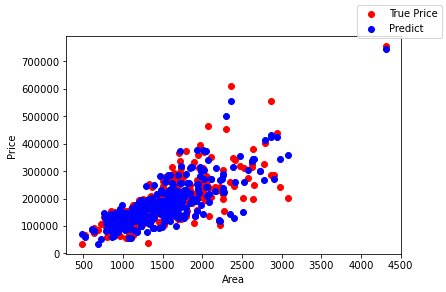

In [119]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
y_predict_dt = regressor.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_predict_dt))
dt2 = mean_squared_error(y_test,y_predict_dt)
plt.scatter(X_test[:,0], y_test, c="Red",label="True Price")
plt.scatter(X_test[:,0], y_predict_dt, c="Blue",label="Predict")
plt.xlabel("Area")
plt.ylabel("Price")
plt.figlegend()
plt.show()

### Random Forest

MSE: 2806352490.9609694


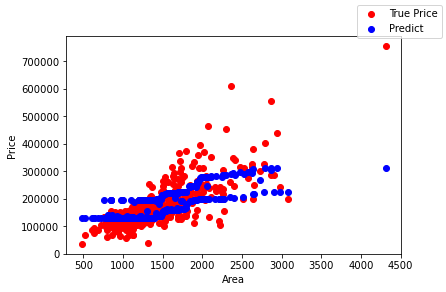

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_predict_rf = regr.predict(X_test)
print("MSE:",mean_squared_error(y_test,y_predict_rf))
rf2 = mean_squared_error(y_test,y_predict_rf)
plt.scatter(X_test[:,0], y_test, c="Red",label="True Price")
plt.scatter(X_test[:,0], y_predict_rf, c="Blue",label="Predict")
plt.xlabel("Area")
plt.ylabel("Price")
plt.figlegend()
plt.show()

Mean Square Error Comparison

In [69]:
field1 = {'Linear Regression': ln1,
                   'SVM': svm1,
                   'Decision Tree': dt1,
                   'Random Forest': rf1,
                   }
GrLivArea = pd.Series(field1)
field2 = {'Linear Regression': lr2,
                   'SVM': svm2,
                   'Decision Tree': dt2,
                   'Random Forest': rf2,
                   }
YearBuilt = pd.Series(field2)
compare = pd.DataFrame({'GrLivArea': GrLivArea,
                       'YearBuilt': YearBuilt})
compare

,GrLivArea,YearBuilt
Linear Regression,2.314465e+09,2.314465e+09
SVM,7.169220e+09,7.169220e+09
Decision Tree,2.321867e+09,2.321867e+09
Random Forest,2.806352e+09,2.806352e+09


## Problem 4: (Advance assignment) Learning using other features
So far we have used only two features for practice, but please verify what happens when you add other features. Data analysis will be important for how to select and process them.

You can also refer to Kaggle's Notebooks.

### I will select a different feature that is LotArea because this one is numerical values

In [164]:
X = data.loc[:,["LotArea"]]
Y =data.loc[:,"SalePrice"]

In [165]:
X

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [166]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Analyze data

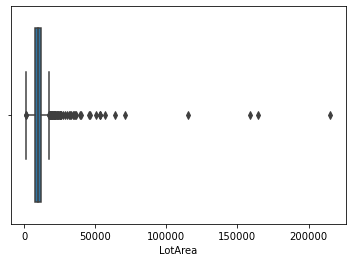

In [171]:
import seaborn as sns
ax = sns.boxplot(x="LotArea", data=X)

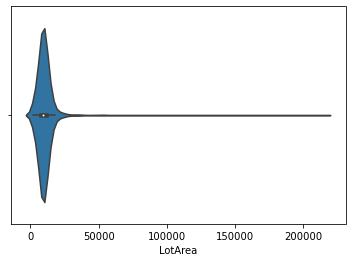

In [172]:
ax = sns.violinplot(x="LotArea", data=X)

Data tend to be right skew and not follow the normal distribution

### Regression Process

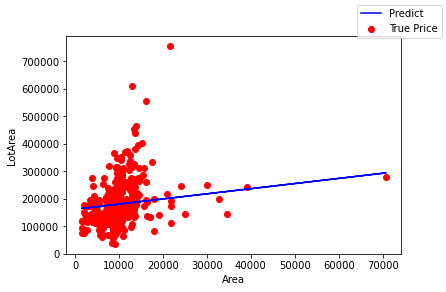

In [163]:

X_train, X_test, y_train, y_test = train_test_split( np.array(X), np.array(Y), test_size=0.25, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_predict = reg.predict(X_test)
plt.scatter(X_test, y_test, c="Red",label="True Price")
plt.plot(X_test, y_predict, c="Blue",label="Predict")
plt.xlabel("Area")
plt.ylabel("LotArea")
plt.figlegend()
plt.show()